### 정밀도와 재현율의 트레이드오프

In [11]:
import pandas as pd


red_wine = pd.read_csv('winequality-red.csv',sep=';')
white_wine = pd.read_csv('winequality-white.csv',sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.
wine = pd.concat([red_wine,white_wine])

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality'] ]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ',accuracy_score(y_train, y_pred_tr))
print('Test Acc : ',accuracy_score(y_test,y_pred_test))

Train Acc :  0.7427361939580527
Test Acc :  0.7438461538461538


#### classification_report


#### 와인 데이터 5등급 퀄리터 보고서

<b>Precision</b>: 정밀도는 예측한 양성(1로 분류한) 샘플 중에서 실제 양성인 샘플의 비율입니다.<p> 
여기서 0.0 클래스의 정밀도는 0.68이고, 1.0 클래스의 정밀도는 0.77입니다.<p>
따라서 0.0 클래스로 예측된 결과 중에서 약 68%만이 실제로 0.0 클래스이며, 1.0 클래스로 예측된 결과 중에서 약 77%만이 실제로 1.0 클래스입니다.<p>

------

<b>Recall</b>: 재현율은 실제 양성(실제로 1인) 샘플 중에서 모델이 정확하게 양성으로 예측한 샘플의 비율입니다. <p>
여기서 0.0 클래스의 재현율은 0.58이고, 1.0 클래스의 재현율은 0.84입니다.<p> 
 
따라서 실제 0.0 클래스 중에서 약 58%만이 모델에 의해 정확하게 0.0 클래스로 예측되었고, 실제 1.0 클래스 중에서 약 84%만이 모델에 의해 정확하게 1.0 클래스로 예측되었습니다.<p>

------

<b>F1-score</b>: F1-점수는 정밀도와 재현율의 조화 평균으로 계산되며, 정확도와 완전성의 균형을 나타냅니다. <p>
여기서 0.0 클래스의 F1-점수는 0.62이고, 1.0 클래스의 F1-점수는 0.81입니다. 따라서 0.0 클래스의 예측 결과는 상대적으로 정확도와 완전성이 조화롭게 유지되었으며, 1.0 클래스의 예측 결과도 높은 정확도와 완전성을 갖고 있습니다.<p>

------

<b>Support</b>: 각 클래스에 해당하는 데이터의 개수를 나타냅니다. <p>
여기서는 0.0 클래스에 477개의 데이터가 있고, 1.0 클래스에 823개의 데이터가 있음을 의미합니다.<p>

----

<b>Accuracy</b>: 전체 데이터에 대한 정확도입니다. 여기서는 0.74로 나타나며, 모델이 전체 데이터에서 예측한 결과와 실제 결과가 일치하는 비율을 나타냅니다.<p>

-----

마지막으로, <b>macro avg</b>와 <b>weighted avg</b>는 클래스 별 평균값을 나타내는 평가 지표입니다. <p> 
macro avg는 각 클래스에 대한 평균을 계산하여 나타내며, weighted avg는 각 클래스의 데이터 개수를 가중치로 사용하여 평균을 계산합니다.<p> 
이를 통해 전체적인 모델의 성능을 평가할 수 있습니다. 여기서는 macro avg와 weighted avg가 동일한 값을 갖고 있으며, 각각의 평가 지표들의 평균 값을 나타냅니다.<p>

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



```
[[275 202]: 실제 클래스가 0인 샘플에 대해 모델이 0으로 예측한 개수는 275개입니다. 이를 true negative(TN)이라고 합니다.
[131 692]]: 실제 클래스가 1인 샘플에 대해 모델이 0으로 예측한 개수는 131개입니다. 이를 false negative(FN)라고 합니다.
[275 202]: 실제 클래스가 0인 샘플에 대해 모델이 1로 예측한 개수는 202개입니다. 이를 false positive(FP)라고 합니다.
[[131 692]]: 실제 클래스가 1인 샘플에 대해 모델이 1로 예측한 개수는 692개입니다. 이를 true positive(TP)라고 합니다.
```

In [15]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, lr.predict(X_test)))

[[275 202]
 [131 692]]


#### precision recall curve 

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

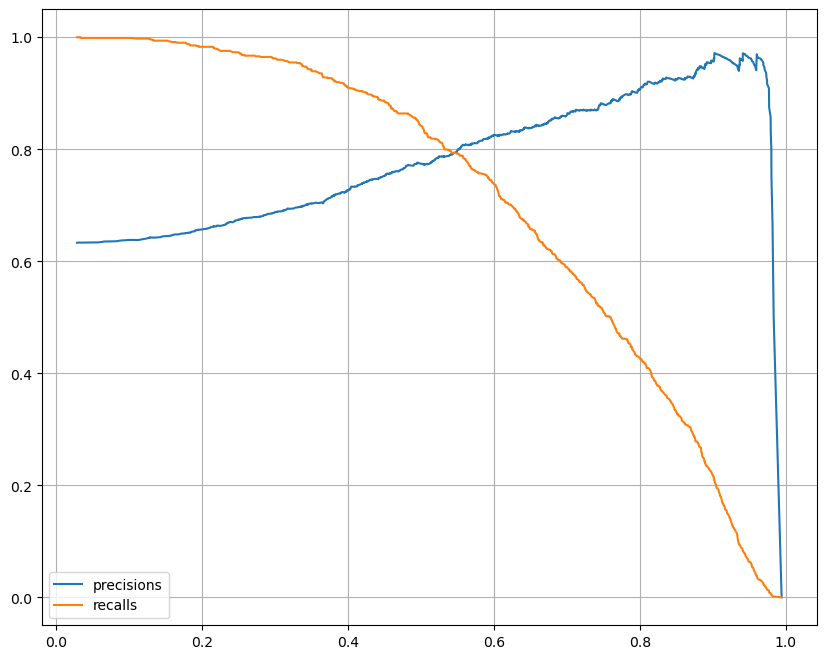

In [17]:
plt.figure(figsize=(10,8))
pred = lr.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

plt.plot(thresholds, precisions[:len(thresholds)], label = 'precisions')
plt.plot(thresholds, recalls[:len(thresholds)], label = 'recalls')
plt.grid()
plt.legend()
plt.show()


#### thresholds = 0.5 일 때 predict_proba

In [20]:
pred_proba = lr.predict_proba(X_test)
pred_proba[:3] # 0일 확률 , 1일 확률 

array([[0.40546348, 0.59453652],
       [0.50937491, 0.49062509],
       [0.10223352, 0.89776648]])

In [21]:
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1,1)], axis=1)

array([[0.40546348, 0.59453652, 1.        ],
       [0.50937491, 0.49062509, 0.        ],
       [0.10223352, 0.89776648, 1.        ],
       ...,
       [0.22558044, 0.77441956, 1.        ],
       [0.67385152, 0.32614848, 0.        ],
       [0.31447772, 0.68552228, 1.        ]])

#### threshold 바꿔보기 - Binarizer

In [30]:
from sklearn.preprocessing import Binarizer

brinarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = brinarizer.transform(pred_proba)[:,1]
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [31]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [32]:
print(classification_report(y_test, pred_bin))


              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.82      0.74      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.73      0.74      1300

